# Customer Analytics Project

## 데이터 세트 설명
이 데이터 세트는 국제 전자상거래 회사의 고객 데이터베이스입니다. 회사는 고객 데이터베이스를 사용하여 제품이 제시간에 배송되는지 여부를 예측하고 통찰력을 얻고자 합니다.

### 컬럼 설명
*   **ID**: 각 고객의 고유 ID 번호입니다.
*   **Warehouse_block**: 회사의 창고 블록 (A, B, C, D, E)입니다.
*   **Mode_of_Shipment**: 제품 배송 방법 (Ship, Flight, Road)입니다.
*   **Customer_care_calls**: 배송 문의를 위한 고객 전화 횟수입니다.
*   **Customer_rating**: 고객이 평가한 등급입니다 (1: 최악, 5: 최고).
*   **Cost_of_the_Product**: 제품 가격 (미국 달러)입니다.
*   **Prior_purchases**: 과거 구매 횟수입니다.
*   **Product_importance**: 회사가 분류한 제품의 중요도 (low, medium, high)입니다.
*   **Gender**: 고객의 성별 (F: 여성, M: 남성)입니다.
*   **Discount_offered**: 특정 제품에 제공된 할인율입니다.
*   **Weight_in_gms**: 제품의 무게 (그램)입니다.
*   **Reached.on.Time_Y.N**: 타겟 변수입니다. 1은 제시간에 도착하지 않음, 0은 제시간에 도착함을 의미합니다.

In [1]:
# #!/bin/bash
# !kaggle datasets download prachi13/customer-analytics

In [48]:
import zipfile
import os

HOME = os.getcwd()
HOME

# zip_file_path = 'customer-analytics.zip'
# extract_to_path = 'data'
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to_path)

'c:\\Users\\user\\github\\sklearn-est15th\\E-commerce\\KBM'

In [49]:
import pandas as pd 
import numpy as np

Train = pd.read_csv(os.path.join(HOME, 'data','Train.csv'))

In [31]:
Train

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


### 1. 검증용 데이터 분리

In [50]:
from sklearn.model_selection import train_test_split

# 1. stratify 옵션을 써서 정답(Reached.on.Time_Y.N) 비율을 유지하며 8:2로 나눕니다.
# 이 함수는 내부적으로 데이터를 랜덤하게 섞어주기 때문에 sample을 따로 안 써도 됩니다.
part1, part2 = train_test_split(Train, 
                                test_size=0.2, 
                                random_state=42, 
                                stratify=Train['Reached.on.Time_Y.N'])

# 2. 각각 파일로 저장
part1.to_csv('data/train_df.csv', index=False)
part2.to_csv('data/test_df.csv', index=False)

print("데이터 분할 및 저장 완료!")
print(f"학습용: {part1.shape}, 테스트용: {part2.shape}")

데이터 분할 및 저장 완료!
학습용: (8799, 12), 테스트용: (2200, 12)


In [51]:
train_df = pd.read_csv('data/train_df.csv')
test_df = pd.read_csv('data/test_df.csv')

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8799 entries, 0 to 8798
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8799 non-null   int64 
 1   Warehouse_block      8799 non-null   object
 2   Mode_of_Shipment     8799 non-null   object
 3   Customer_care_calls  8799 non-null   int64 
 4   Customer_rating      8799 non-null   int64 
 5   Cost_of_the_Product  8799 non-null   int64 
 6   Prior_purchases      8799 non-null   int64 
 7   Product_importance   8799 non-null   object
 8   Gender               8799 non-null   object
 9   Discount_offered     8799 non-null   int64 
 10  Weight_in_gms        8799 non-null   int64 
 11  Reached.on.Time_Y.N  8799 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 825.0+ KB


In [8]:
test_df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1667,C,Ship,4,5,268,3,low,F,59,2083,1
1,6543,A,Ship,7,5,296,4,low,F,2,1823,1
2,6429,A,Road,3,5,139,2,low,M,2,5839,0
3,8061,A,Road,5,5,186,4,low,M,3,4287,0
4,9823,D,Ship,3,3,149,4,low,F,2,5282,0


## 2. 컬럼별 데이터 분석

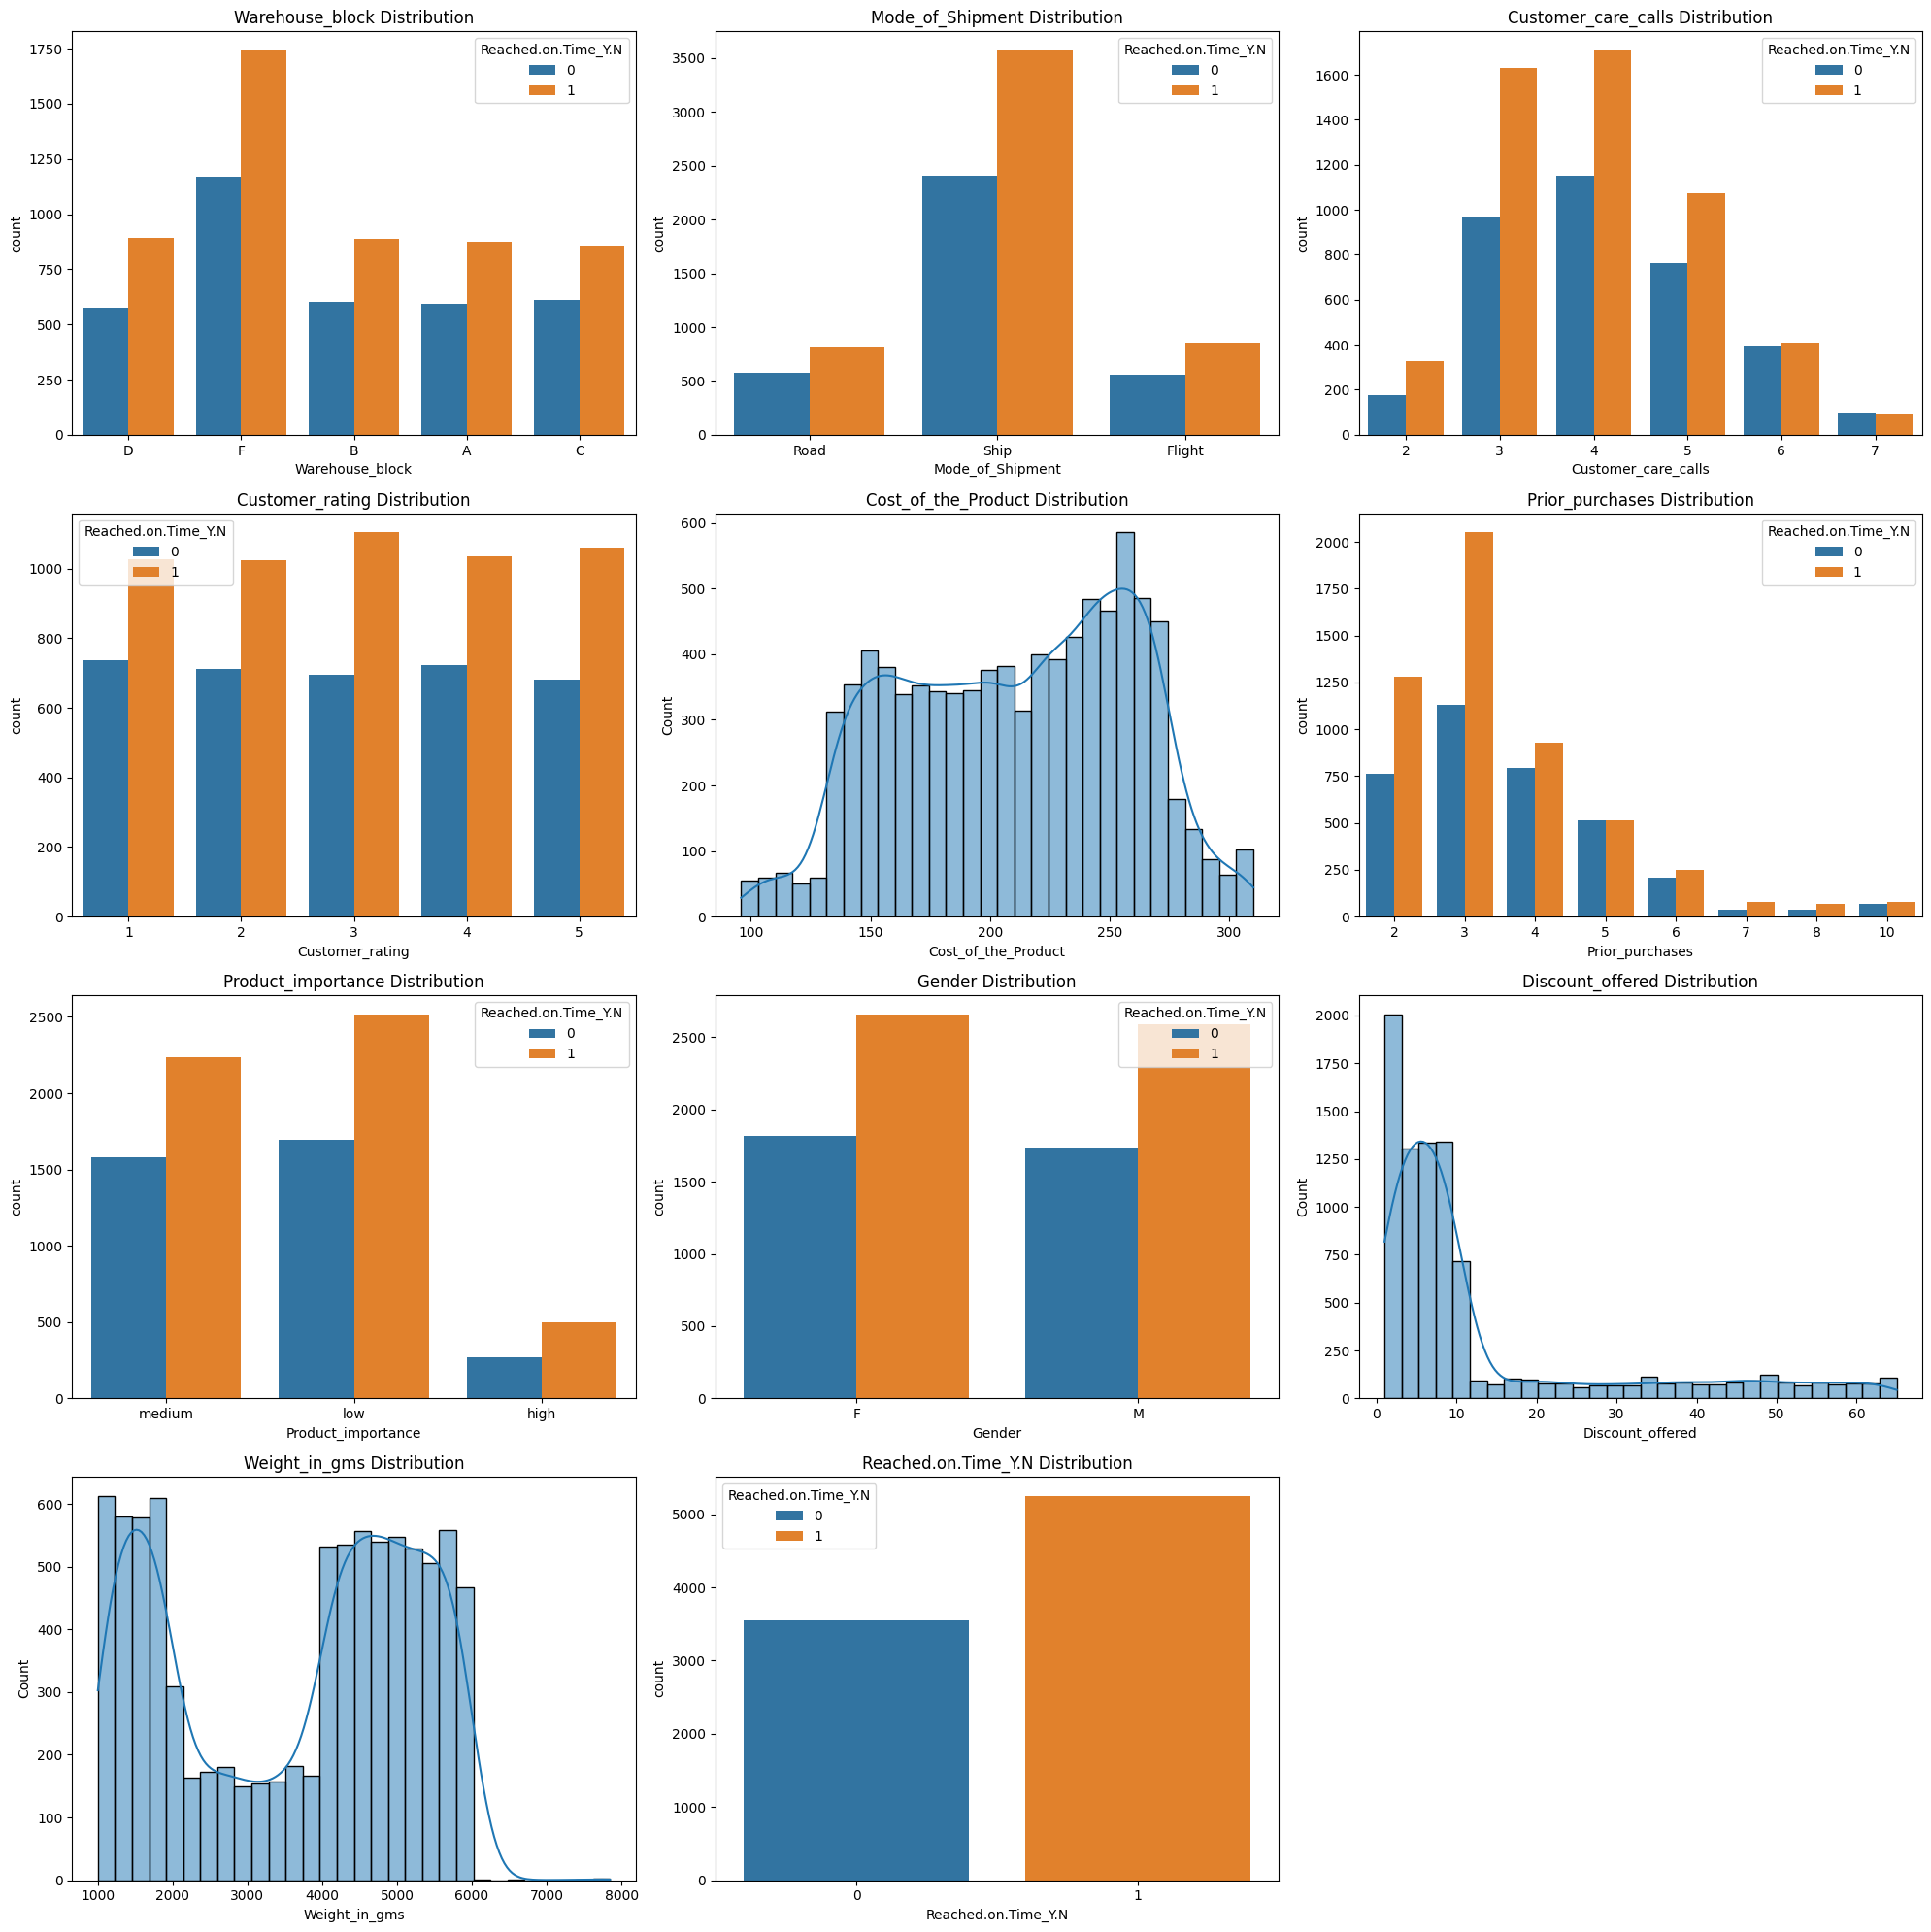

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
# 컬럼별 시각화
columns = train_df.columns.tolist()
columns.remove('ID') # ID는 시각화 제외

plt.figure(figsize=(20, 20))
for i, col in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    if train_df[col].dtype == 'object' or train_df[col].nunique() < 10:
        sns.countplot(x=col, data=train_df, hue='Reached.on.Time_Y.N')
        plt.title(f'{col} Distribution')
    else:
        sns.histplot(train_df[col], kde=True, bins=30)
        plt.title(f'{col} Distribution')
    plt.tight_layout()
plt.show()

In [10]:
train_df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [11]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 가격을 5개 구간으로 나누어 지연율 확인
# train_df['cost_bin'] = pd.qcut(train_df['Cost_of_the_Product'], q=5)

# plt.figure(figsize=(10, 6))
# sns.barplot(x='cost_bin', y='Reached.on.Time_Y.N', data=train_df)
# plt.title('Delay Rate by Cost Bin')
# plt.ylabel('Delay Probability (Mean of Target)')
# plt.show()

## 3. 전처리 및 특성 엔지니어링

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. 합치기 (나중에 나누기 위해 행 개수 저장)
n_train = len(train_df)
all_data = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

# 2. 컬럼 추가
# 2-1. 할인율 10% 초과 여부 컬럼 생성 (Binary Feature) 10% 이하면 0, 10% 초과면 1
all_data['is_high_discount'] = (all_data['Discount_offered'] > 10).astype(int)

# 2-2. 무게 구간별 분류 (Binning)
# 분석 결과 2kg~4kg가 핵심이므로, 이를 포함한 3개 구간으로 나눔.
bins = [0, 2000, 4000, all_data['Weight_in_gms'].max()]
labels = ['Low_Weight', 'Mid_Weight', 'High_Weight']
all_data['weight_bin'] = pd.cut(all_data['Weight_in_gms'], bins=bins, labels=labels)

# 2-3. 가격 대비 할인 체감도 (가성비 지표)
all_data['Discount_to_Price_Ratio'] = all_data['Discount_offered'] / all_data['Cost_of_the_Product']

# 2-4 가격/무게
all_data['log_rel_price'] = np.log(all_data['Cost_of_the_Product'] / all_data['Weight_in_gms'])

# 2-4. 불필요한 컬럼을 삭제 weight_bin이 앞에 생성한 구간별 분류 컬럼과 상관관계가 너무 높음(다중공선성) 삭제처리.
all_data = all_data.drop(['ID', 'Customer_care_calls', 'Customer_rating','Gender', 'Warehouse_block','weight_bin'], axis=1)

# 3-1. 원-핫 인코딩 (Mode_of_Shipment)
all_data = pd.get_dummies(all_data, columns=['Mode_of_Shipment'])

# 3-2. 라벨 인코딩 (원-핫 안 한 나머지 글자 컬럼들)
le = LabelEncoder()
for col in all_data.select_dtypes(include=['object']).columns:
    all_data[col] = le.fit_transform(all_data[col].astype(str))

# 4. 타겟 컬럼을 맨 뒤로 재배치(보기 편하게)
target_col = 'Reached.on.Time_Y.N'
# 타겟을 제외한 나머지 컬럼 이름들 + 타겟 컬럼 이름 순으로 리스트를 생성
cols = [c for c in all_data.columns if c != target_col] + [target_col]
all_data = all_data[cols]

# 5. 원래 변수명 그대로 나누기 (기존 코드)
train_df = all_data.iloc[:n_train, :].copy()
test_df = all_data.iloc[n_train:, :].copy()

print("처리 완료!")
print(f"컬럼 개수 일치 확인: {train_df.shape[1]} == {test_df.shape[1]}")

처리 완료!
컬럼 개수 일치 확인: 12 == 12


In [13]:
train_df.columns

Index(['Cost_of_the_Product', 'Prior_purchases', 'Product_importance',
       'Discount_offered', 'Weight_in_gms', 'is_high_discount',
       'is_low_price_delay', 'log_Cost', 'Mode_of_Shipment_Flight',
       'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship',
       'Reached.on.Time_Y.N'],
      dtype='object')

## 4. 상관관계 분석 및 시각화

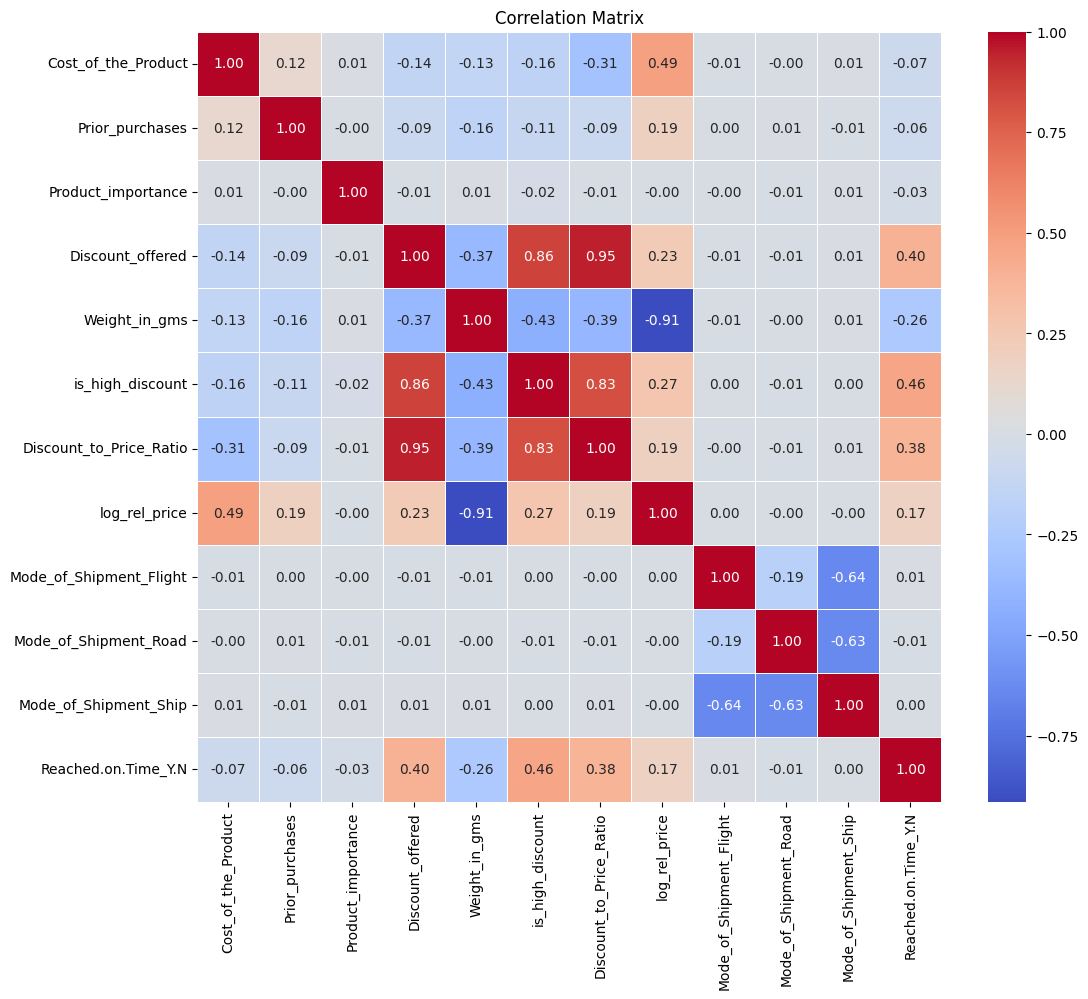

In [54]:
# 상관관계 매트릭스
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = train_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## 5. 6가지 모델로 분석 후 성능 비교

In [57]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# 데이터 분리 > 위에서 하고들어옴
# X = train_df.drop('Reached.on.Time_Y.N', axis=1)
# y = train_df['Reached.on.Time_Y.N']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. 학습용 데이터 준비 (전체의 80%였던 train_df 사용)
X_train = train_df.drop('Reached.on.Time_Y.N', axis=1)
y_train = train_df['Reached.on.Time_Y.N']

# 2. 테스트용 데이터 준비 (전체의 20%였던 test_df 사용)
X_test = test_df.drop('Reached.on.Time_Y.N', axis=1)
y_test = test_df['Reached.on.Time_Y.N']

# 밖에서 미리 정의
xgb_tuned = XGBClassifier(n_estimators=1000, learning_rate=0.05, max_depth=6, random_state=42)
lgbm_tuned = LGBMClassifier(n_estimators=1000, learning_rate=0.05, num_leaves=31, random_state=42, verbose=-1)

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb_tuned,  
    'LightGBM': lgbm_tuned
}

# 모델 학습 및 평가
performance = {}

print("모델별 성능:")
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    performance[name] = acc
    # print(f"{name:<20}: Accuracy = {acc:.4f}")

# 성능 기준으로 정렬
sorted_performance = sorted(performance.items(), key=lambda x: x[1], reverse=True)

# 2. 정렬된 결과 출력
print("\n" + "="*30)
print(f"{'Model Name':<20} | {'Accuracy':<10}")
print("-" * 30)

for name, acc in sorted_performance:
    print(f"{name:<20} | {acc:.4f}")
print("="*30)

모델별 성능:

Model Name           | Accuracy  
------------------------------
Gradient Boosting    | 0.6859
SVC                  | 0.6786
AdaBoost             | 0.6727
Random Forest        | 0.6568
XGBoost              | 0.6518
LightGBM             | 0.6423


## 6. 성능이 가장 좋은 3개 모델로 앙상블

In [58]:
from sklearn.ensemble import VotingClassifier

# 상위 3개 모델 선택
top_3_models = [model_name for model_name, acc in sorted_performance[:3]]
print(f"Selected Top 3 Models: {top_3_models}")

estimators = [(name, models[name]) for name in top_3_models]

# 앙상블 모델 생성 (Soft Voting)
ensemble_model = VotingClassifier(estimators=estimators, voting='soft')
ensemble_model.fit(X_train, y_train)

# 앙상블 성능 평가
ensemble_pred = ensemble_model.predict(X_test)
ensemble_acc = accuracy_score(y_test, ensemble_pred)
print(f"Ensemble Model Accuracy: {ensemble_acc:.4f}")

Selected Top 3 Models: ['Gradient Boosting', 'SVC', 'AdaBoost']
Ensemble Model Accuracy: 0.6773


## 7. 앙상블 모델 성능 분석 후 시각화

C:\Users\user\AppData\Local\Temp\ipykernel_23788\2315579198.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=model_names, palette='magma')


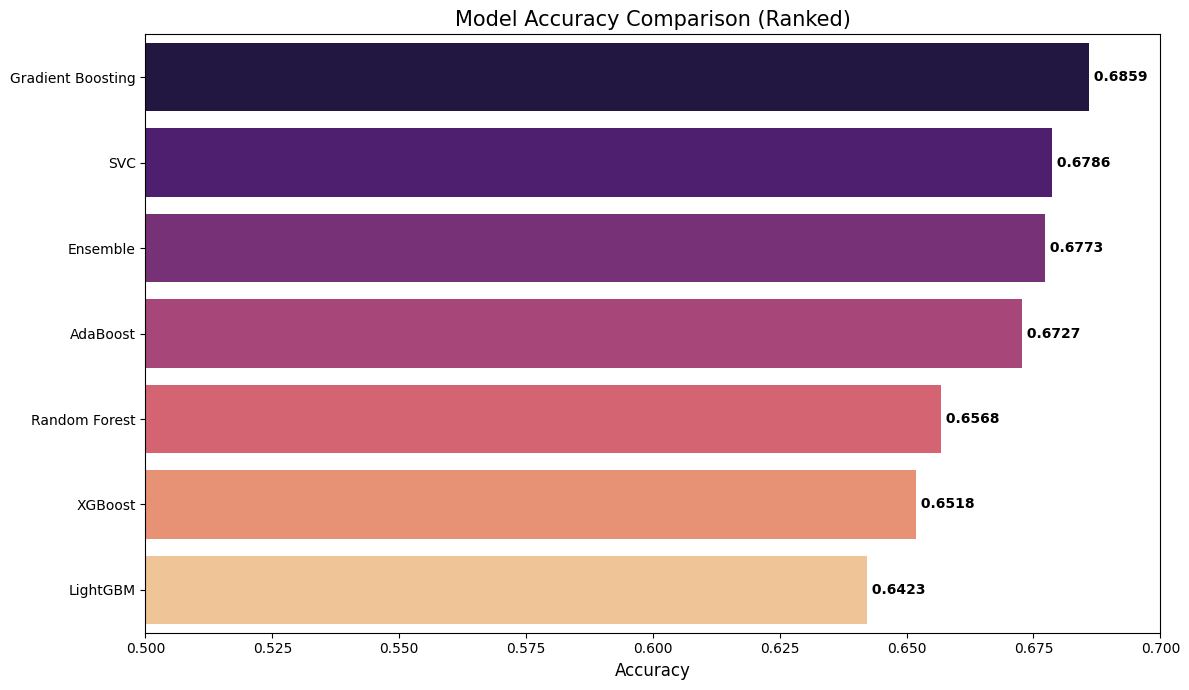

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# 성능 비교 시각화
# 1. 모든 모델의 이름과 성적을 하나의 리스트로 통합 (앙상블 포함)
all_performance = sorted_performance + [('Ensemble', ensemble_acc)]

# 2. 성적(Accuracy) 기준 내림차순 정렬
# x[1]은 정확도 값을 의미
all_performance_sorted = sorted(all_performance, key=lambda x: x[1], reverse=True)

# 3. 시각화를 위한 데이터 분리
model_names = [name for name, _ in all_performance_sorted]
accuracies = [acc for _, acc in all_performance_sorted]

# 4. 차트 그리기
plt.figure(figsize=(12, 7))
# 정확도 순서대로 정렬되었으므로 palette도 순서에 맞게 적용
sns.barplot(x=accuracies, y=model_names, palette='magma')

plt.title('Model Accuracy Comparison (Ranked)', fontsize=15)
plt.xlabel('Accuracy', fontsize=12)
plt.xlim(0.5, 0.7)  # 차이를 극대화하기 위해 범위를 데이터에 맞춰 조정

# 수치 표시
for i, v in enumerate(accuracies):
    plt.text(v, i, f" {v:.4f}", va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 8. 앙상블 모델 하이퍼파라미터 튜닝

In [ ]:
# 성능 더 떨어짐. 튜닝 수정 필요
# 가중치 고정의 한계: [1, 1, 1]이나 [2, 1, 1]은 사실 모델의 예측 확률에 아주 미세한 차이만 줍니다. 개별 모델이 이미 비슷한 정답을 내고 있다면 가중치 변경은 큰 의미가 없음

# from sklearn.model_selection import GridSearchCV

# # 앙상블 모델의 가중치 튜닝 예시 (VotingClassifier는 voting='soft'일 때 weights 파라미터가 있음)
# # 여기서는 GradientBoostingClassifier를 튜닝하여 성능을 높여보는 시도를 하거나,
# # VotingClassifier의 weights를 최적화해볼 수 있습니다.
# # 간단하게 VotingClassifier의 weights를 튜닝해보겠습니다.

# params = {
#     'weights': [[1, 1, 1], [2, 1, 1], [1, 2, 1], [1, 1, 2], [2, 2, 1], [2, 1, 2], [1, 2, 2]]
# }

# grid = GridSearchCV(ensemble_model, params, cv=3, scoring='accuracy', n_jobs=-1)
# grid.fit(X_train, y_train)

# print("Best Weights:", grid.best_params_)
# print("Best Cross-Validation Score:", grid.best_score_)

# best_ensemble = grid.best_estimator_